In [47]:
import os, sys
import glob
import numpy as np
from astropy.table import Table, vstack, hstack, Column
import matplotlib.pyplot as plt
from matplotlib import patches
from astropy.coordinates import SkyCoord
import matplotlib.gridspec as gridspec


plt.style.use('mplstyle')

# Time New Roman font doesn't works in tiger, so I use STIXGeneral
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


# retina
%config InlineBackend.figure_format = 'retina'

In [48]:
tract_stat = Table.read('../dr1_qa/sky/tract_stat.ecsv', format='ascii.ecsv')
patch_stat = Table.read('../dr1_qa/sky/patch_stat_8280.ecsv', format='ascii.ecsv')

print('Use %d tracts: %s' % (len(tract_stat), tract_stat['tract'].data))
print('Use %d patches for Tract %d' % (len(patch_stat), tract_stat['tract'].data[0]))

Use 19 tracts: [ 8280  8525  8764  9010  9078  9088  9099  9135  9227  9319  9456  9459
  9470  9556  9946  9953 10040 10048 10061]
Use 31 patches for Tract 8280


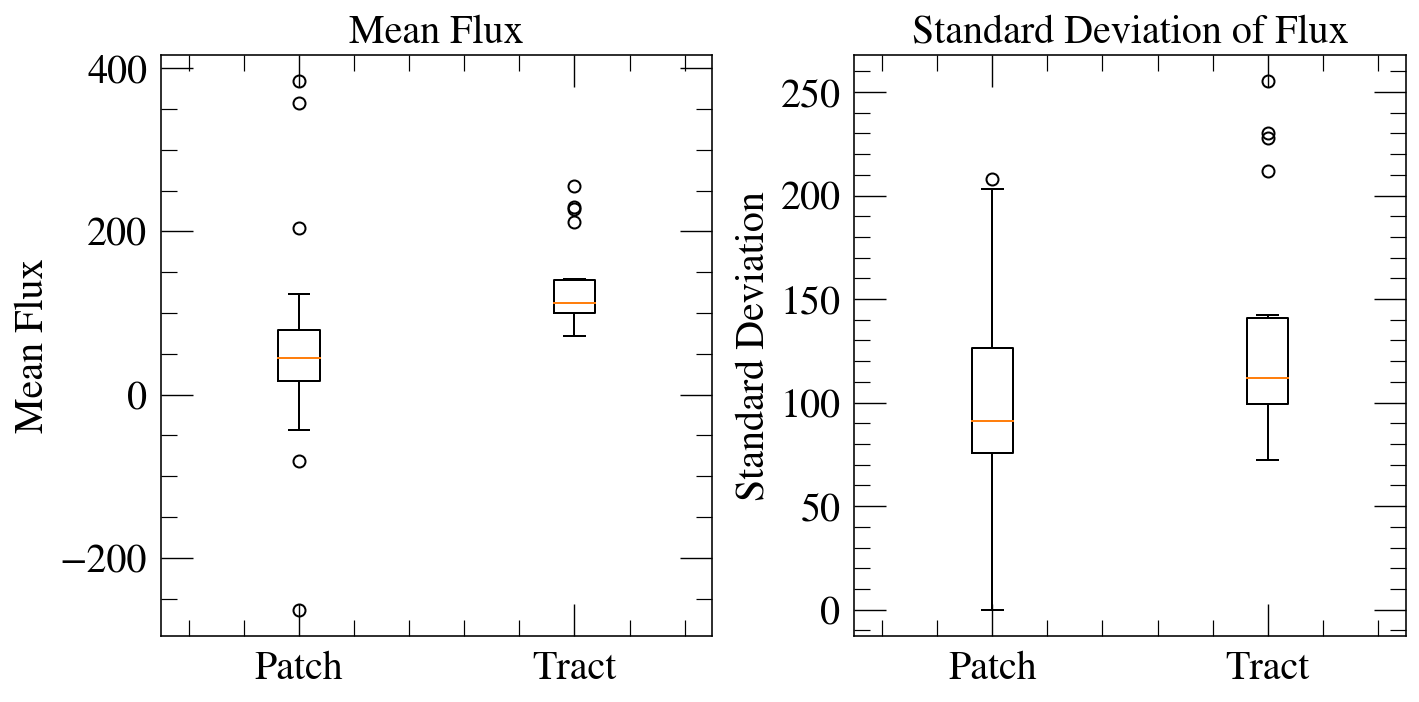

In [49]:
# Create boxplots
plt.figure(figsize=(10, 5))



# Mean Flux Boxplot
plt.subplot(1, 2, 1)
plt.boxplot([patch_stat['median'], tract_stat['std']], labels=['Patch', 'Tract'], showfliers=True)
plt.title('Mean Flux', fontsize=20)
plt.ylabel('Mean Flux', fontsize=20)

# Standard Deviation Boxplot
plt.subplot(1, 2, 2)
plt.boxplot([patch_stat['std'], tract_stat['std']], labels=['Patch', 'Tract'], showfliers=True)
plt.title('Standard Deviation of Flux', fontsize=20)
plt.ylabel('Standard Deviation', fontsize=20)

plt.tight_layout()
plt.savefig('figures/skyobj_flux_stat.png', dpi=300, bbox_inches='tight')